In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Cars.csv')

In [4]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


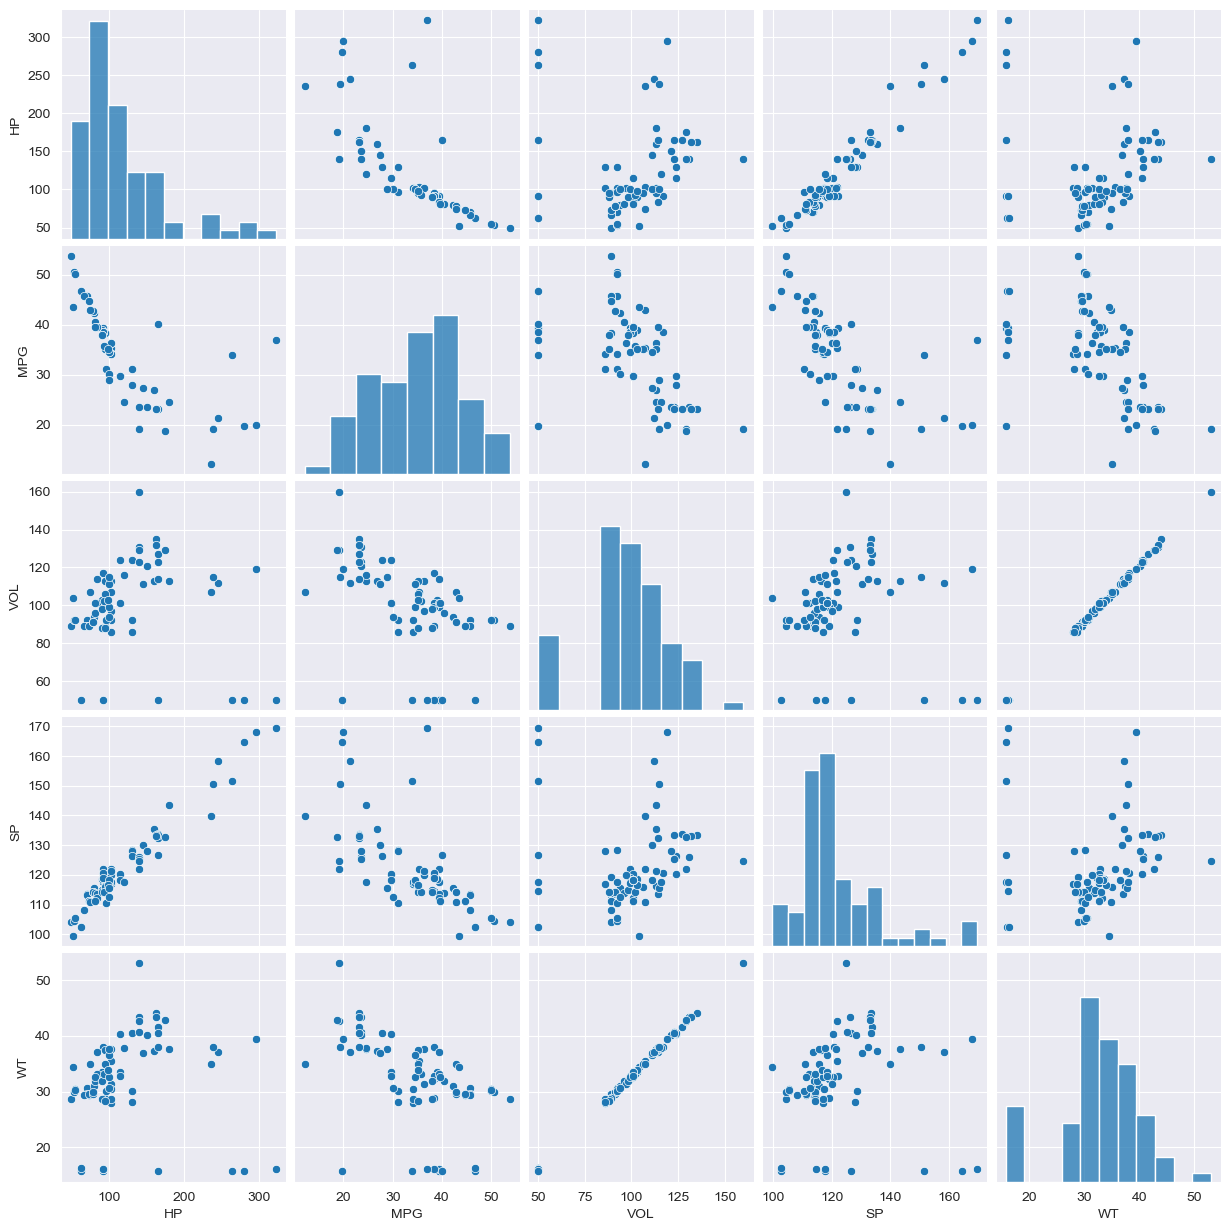

In [8]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data=data)


In [17]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~HP+VOL+SP+WT',data=data).fit()

In [18]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [19]:
model.tvalues,model.pvalues

(Intercept    2.058841
 HP          -5.238735
 VOL         -0.590970
 SP           2.499880
 WT           0.236541
 dtype: float64,
 Intercept    0.042936
 HP           0.000001
 VOL          0.556294
 SP           0.014579
 WT           0.813649
 dtype: float64)

In [21]:
model.rsquared,model.rsquared_adj

(0.7705372737359844, 0.7584602881431415)

In [22]:
mlv=smf.ols('MPG~VOL',data=data).fit()
print(mlv.tvalues,'/n',mlv.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 /n Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [23]:
mlh=smf.ols('MPG~HP',data=data).fit()
print(mlh.tvalues,'/n',mlh.pvalues)

Intercept    29.722460
HP           -9.357053
dtype: float64 /n Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64


In [24]:
mlW=smf.ols('MPG~WT',data=data).fit()
print(mlW.tvalues,'/n',mlW.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 /n Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [25]:
mlS=smf.ols('MPG~SP',data=data).fit()
print(mlS.tvalues,'/n',mlS.pvalues)

Intercept    13.695100
SP           -8.406007
dtype: float64 /n Intercept    1.457105e-22
SP           1.407325e-12
dtype: float64


# CALCULATE VIF_VALUES

In [28]:
MV=smf.ols('VOL~HP+WT+SP',data=data).fit().rsquared
V_V=1/(1-MV)

In [29]:
HV=smf.ols('HP~VOL+WT+SP',data=data).fit().rsquared
V_H=1/(1-HV)

In [30]:
SV=smf.ols('SP~HP+WT+VOL',data=data).fit().rsquared
V_S=1/(1-SV)

In [31]:
WV=smf.ols('WT~HP+VOL+SP',data=data).fit().rsquared
V_W=1/(1-WV)

In [37]:
NEWDATA={'variable':['VOL','HP','SP','WT'],'VIF':[V_V,V_H,V_S,V_W]}

In [38]:
NEWDATA

{'variable': ['VOL', 'HP', 'SP', 'WT'],
 'VIF': [638.8060836592878,
  19.926588974998563,
  20.00763878305008,
  639.5338175572624]}

In [39]:
D=pd.DataFrame(NEWDATA)

In [40]:
D

,variable,VIF
0,VOL,638.806084
1,HP,19.926589
2,SP,20.007639
3,WT,639.533818
